# Locally Linear Embedding

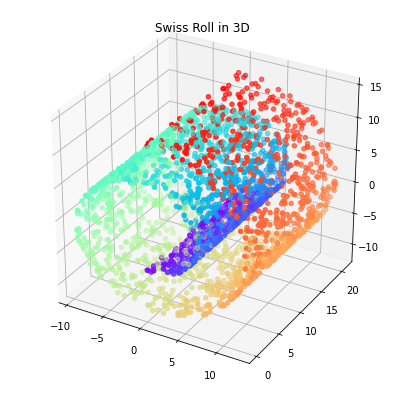

In [ ]:
# Imports & Dataset Preparation

from sklearn.datasets import make_swiss_roll, make_s_curve
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import locally_linear_embedding
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import linalg
from scipy.linalg import eigh

X, color = make_swiss_roll(n_samples=3000, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

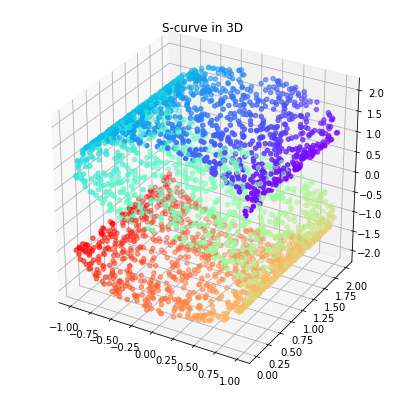

In [ ]:
X_sc, color_sc = make_s_curve(n_samples=3000, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sc[:, 0], X_sc[:, 1], X_sc[:, 2], c=color_sc, cmap=plt.cm.rainbow)
plt.title('S-curve in 3D')
plt.show()

### SKlearn

Example 1: Swirl Roll

[[-0.01113978 -0.01368027]
 [ 0.01402831 -0.0176355 ]
 [ 0.0178652   0.02542161]
 ...
 [ 0.01806502  0.00058846]
 [-0.00203064 -0.00683963]
 [ 0.00615403  0.01794904]] 2.7456866888302463e-08


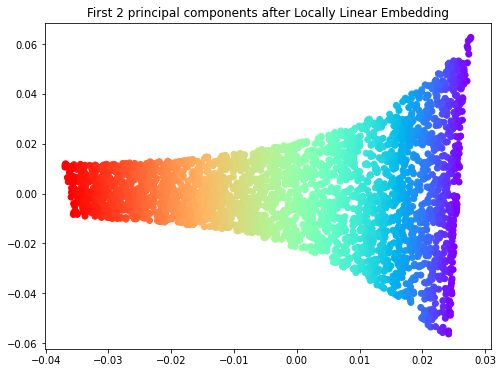

In [ ]:
# Number of dimensions is 2

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

[[-0.01113941]
 [ 0.01402859]
 [ 0.01786497]
 ...
 [ 0.01806518]
 [-0.0020306 ]
 [ 0.00615402]] 1.8684922731716732e-10


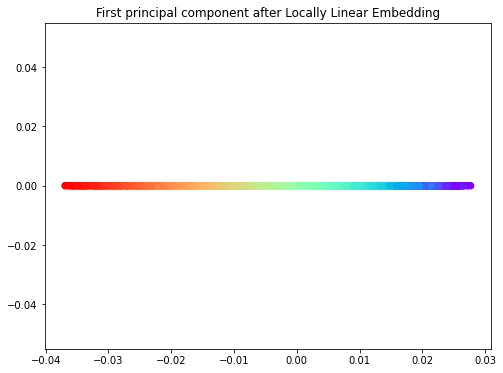

In [ ]:
# Number of dimensions is 1

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=1)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros(X_lle.shape), c=color, cmap=plt.cm.rainbow)
plt.title('First principal component after Locally Linear Embedding')
plt.show()

Example 2: S-curve

[[ 0.01272609 -0.02617388]
 [-0.01302041 -0.01611846]
 [-0.01753784  0.02043655]
 ...
 [-0.01819288  0.00047911]
 [ 0.00455095 -0.01202083]
 [-0.00353589  0.01669574]] 5.239426308593354e-08


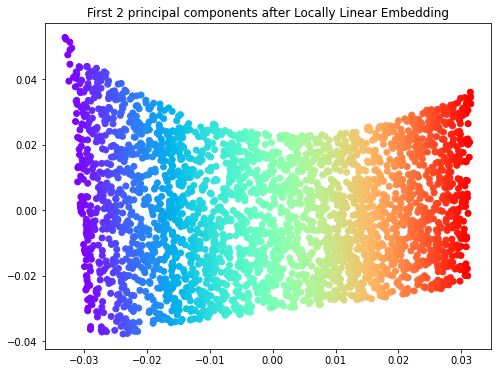

In [ ]:
# Number of dimensions is 2

X_lle, err = locally_linear_embedding(X_sc, n_neighbors=12, n_components=2)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color_sc, cmap=plt.cm.rainbow)
plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

[[-0.0127259 ]
 [ 0.01302015]
 [ 0.0175377 ]
 ...
 [ 0.01819252]
 [-0.00455156]
 [ 0.00353635]] 1.56983845329007e-10


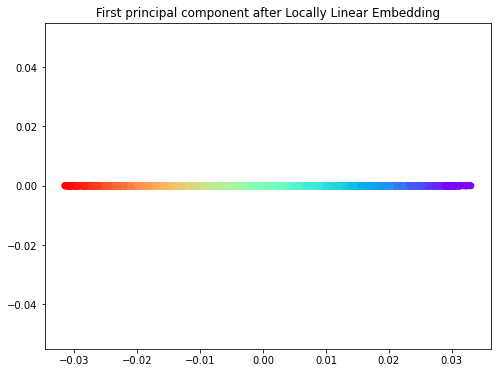

In [ ]:
# Number of dimensions is 1

X_lle, err = locally_linear_embedding(X_sc, n_neighbors=12, n_components=1)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros(X_lle.shape), c=color_sc, cmap=plt.cm.rainbow)
plt.title('First principal component after Locally Linear Embedding')
plt.show()

### Code Implementation

References Used:
* https://www.youtube.com/watch?v=GzVj4e0-DUA
* https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/manifold/_locally_linear.py

In [ ]:
# Locally Linear Embedding

def LLE(X, n_neighbors, n_components, reg = 1e-3):
    N = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity', include_self=False).toarray()
    W = []
    for i, Xi in enumerate(X):
        Xm = X[N[i]==1]
        Zi = Xm - Xi
        Gi = np.dot(Zi, Zi.T)
        trace = np.trace(Gi)
        if trace > 0: R = reg * trace
        else: R = reg
        Gi.flat[:: n_neighbors + 1] += R
        Gi_1 = np.linalg.inv(Gi)
        v1 = np.ones(Gi.shape[1])
        wi = (np.dot(Gi_1, v1))/np.dot(np.dot(v1.T, Gi_1), v1)
        wi_ = []
        k = 0
        for Nij in N[i]:
            if Nij==1:
                wi_.append(wi[k])
                k+=1
            else: wi_.append(0)
        W.append(wi_)
    W = np.asarray(W)
    I = np.identity(W.shape[1])
    S = I - W
    M = np.dot(S.T, S)
    eig_vals, eig_vects = eigh(M, eigvals=(1, n_components), overwrite_a=True)
    indices = np.argsort(eig_vals)
    return eig_vects[:, indices], np.sum(eig_vals)

Example-1: Swiss Roll

[[-0.01113943 -0.01368356]
 [ 0.01402866 -0.01763875]
 [ 0.01786508  0.02542318]
 ...
 [ 0.01806512  0.00058783]
 [-0.00203055 -0.0068403 ]
 [ 0.00615407  0.01794884]] 2.7456834915248907e-08


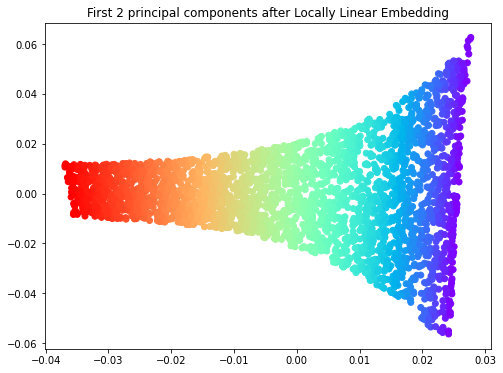

In [ ]:
# Number of dimensions is 2

X_lle, err = LLE(X, 12, 2)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

[[-0.01113943]
 [ 0.01402866]
 [ 0.01786508]
 ...
 [ 0.01806512]
 [-0.00203055]
 [ 0.00615407]] 1.8684991528704342e-10


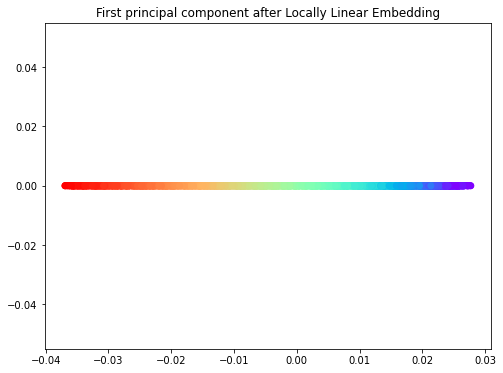

In [ ]:
# Number of dimensions is 1

X_lle, err = LLE(X, 12, 1)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros(X_lle.shape), c=color, cmap=plt.cm.rainbow)
plt.title('First principal component after Locally Linear Embedding')
plt.show()

Example 2: S-curve

[[ 0.0127261  -0.02617232]
 [-0.0130204  -0.01611611]
 [-0.01753784  0.02043647]
 ...
 [-0.01819289  0.00047701]
 [ 0.00455096 -0.01202006]
 [-0.0035359   0.01669124]] 5.239443047829849e-08


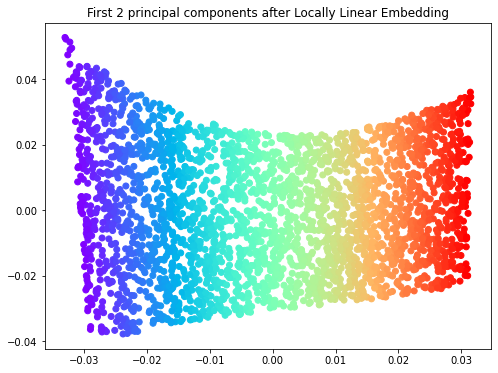

In [ ]:
# Number of dimensions is 2

X_lle, err = LLE(X_sc, 12, 2)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color_sc, cmap=plt.cm.rainbow)
plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

[[ 0.0127261 ]
 [-0.0130204 ]
 [-0.01753784]
 ...
 [-0.01819289]
 [ 0.00455096]
 [-0.0035359 ]] 1.5698362039562984e-10


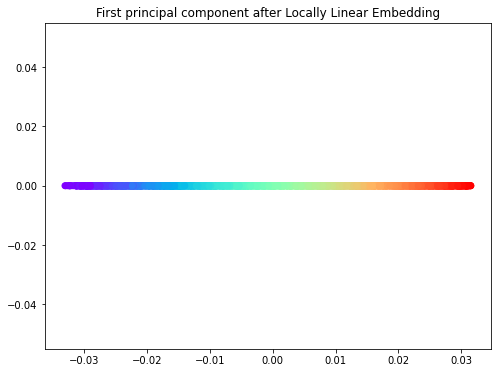

In [ ]:
# Number of dimensions is 1

X_lle, err = LLE(X_sc, 12, 1)
print(X_lle, err)
plt.figure(figsize=(8,6))
plt.scatter(X_lle, np.zeros(X_lle.shape), c=color_sc, cmap=plt.cm.rainbow)
plt.title('First principal component after Locally Linear Embedding')
plt.show()